In [1]:
import calcbench as cb
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [10]:
z_score_metrics = ['CurrentAssets',
                   'CurrentLiabilities', 
                   'Assets', 
                   'RetainedEarnings', 
                   'EBIT', 
                   'MarketCapAtEndOfPeriod',
                  'Liabilities',
                  'Revenue']

In [42]:
crude_and_natural_gas_SIC = 1311

In [46]:
def industry_z_score(SIC_code, bad_tickers):
    peer_group = cb.companies(SIC_codes=[SIC_code])
    z_score_data = cb.normalized_dataframe(company_identifiers=list(peer_group.ticker), 
                                           metrics=z_score_metrics, 
                                           start_year=2008, start_period=0, 
                                           end_year=2014, end_period=0)
    aggregate_data = z_score_data.sum(level=[0], axis=1)
    return z_score(aggregate_data)

In [39]:
def z_score(inputs):
    working_capital = inputs['CurrentAssets'] - inputs['CurrentLiabilities']
    

    z_score = (1.2 * (working_capital / inputs['Assets']) + 
              1.4 * (inputs['RetainedEarnings'] / inputs['Assets']) +
              3.3 * (inputs['EBIT'] / inputs['Assets']) +
              0.6 * (inputs['MarketCapAtEndOfPeriod'] / inputs['Liabilities']) +
              .99 * (inputs['Revenue'] / inputs['Assets']))
    
    return z_score

In [40]:
z_score(z_score_data.sum(level=[0], axis=1))

period
2008      1.885423
2009      1.684778
2010      2.032320
2011      1.789922
2012      1.459113
2013      1.692637
2014      1.441063
Freq: A-DEC, dtype: float64

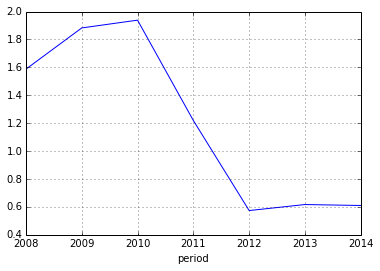

In [83]:
industry_z_score(1200).plot()

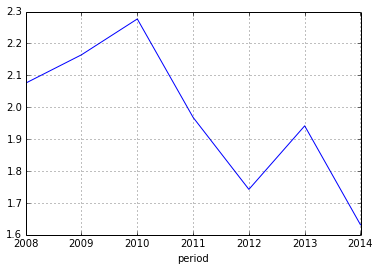

In [82]:
industry_z_score(1300).plot()

In [53]:
peer_group = cb.companies(SIC_codes=[1000])
z_score_data = cb.normalized_dataframe(company_identifiers=list(peer_group.ticker), 
                                       metrics=z_score_metrics, 
                                       start_year=2008, start_period=0, 
                                       end_year=2014, end_period=0)

In [54]:
z_score_data

metric MarketCapAtEndOfPeriod                                                \
ticker                   AAGC         ABHD ABX ADNT AEM AGPH AIVN ALTA ALTO   
period                                                                        
2008                      NaN          NaN NaN  NaN NaN  NaN  NaN  NaN  NaN   
2009                      NaN          NaN NaN  NaN NaN  NaN  NaN  NaN  NaN   
2010                      NaN          NaN NaN  NaN NaN  NaN  NaN  NaN  NaN   
2011                      NaN          NaN NaN  NaN NaN  NaN  NaN  NaN  NaN   
2012                      NaN  56235383.64 NaN  NaN NaN  NaN  NaN  NaN  NaN   
2013                      NaN  33263100.71 NaN  NaN NaN  NaN  NaN  NaN  NaN   
2014                      NaN  19192040.56 NaN  NaN NaN  NaN  NaN  NaN  NaN   

metric        ...     Assets                                              \
ticker AMCM   ...       WCYN     WMTM     WMTN    WOLV    WSGP       XPL   
period        ...                                                          
2008    NaN   ...        NaN      NaN      NaN     NaN     NaN       NaN   
2009    NaN   ...        NaN      NaN      NaN     NaN     NaN       NaN   
2010    NaN   ...    2576653  7309065   675781   32359   17367  29608000   
2011    NaN   ...      30036  5341349  1277857    8074    4417  22054000   
2012    NaN   ...        NaN  4217334  1229192    3354    4010  23483000   
2013    NaN   ...        NaN  4803748  1501259  203438   19300  19500000   
2014    NaN   ...        NaN  1994870  3783404   98920  122683  19040000   

metric                                  
ticker      XTGR   YKMN   YTRV    ZDVN  
period                                  
2008         NaN    NaN    NaN     NaN  
2009         NaN    NaN    NaN     NaN  
2010    13019905  17457    NaN     416  
2011     9823316    532    360     188  
2012     4836377    NaN  37500  506173  
2013     3616752    NaN    NaN  576931  
2014     2713212    NaN    NaN  116327  

[7 rows x 2416 columns]

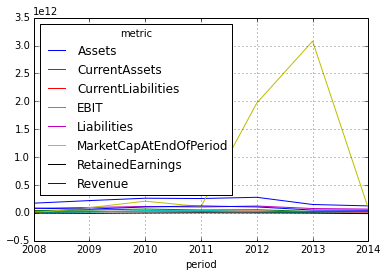

In [56]:
z_score_data.sum(level=[0], axis=1).plot()